In [6]:
from sklearn import datasets
import warnings
warnings.filterwarnings(action='once')
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as ax3d
import seaborn as sns; sns.set()
import numpy as np
from sklearn.utils import shuffle
from sklearn.mixture import GMM

/home/supercloud/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/supercloud/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [3]:
from sklearn.datasets import make_classification

In [132]:
X, Y = make_classification(n_samples=1000, n_features=10, n_informative = 10, n_redundant=0, n_classes=5, random_state=0)

In [202]:
train_X = X[:30]
train_Y = Y[:30]
test_X = X[30:]
test_Y = Y[30:]

/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


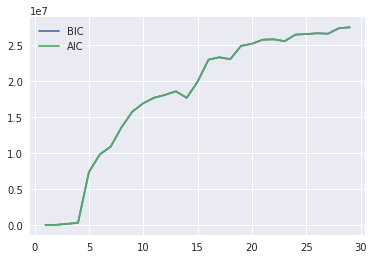

In [204]:
n_components = np.arange(1,30)
models = [GMM(n, covariance_type='full', random_state=0).fit(train_X) for n in n_components]
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')

In [205]:
from sklearn.svm import LinearSVC
reg = LinearSVC()
reg.fit (train_X, train_Y)
pred = reg.predict(test_X)
from sklearn.metrics import mean_squared_error
mean_squared_error(test_Y, pred)

4.1855670103092786

/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function sample_gaussian is deprecated; The function sample_gaussian is deprecated in 0.18 and will be removed in 0.20. Use numpy.random.multivariate_normal instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


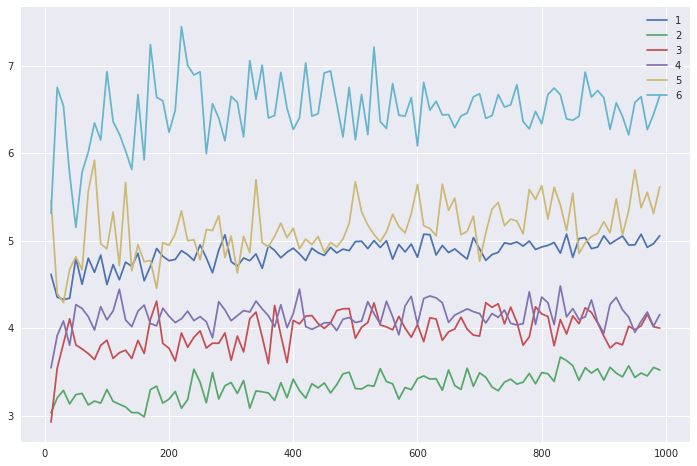

In [227]:
from sklearn import linear_model
n_sample = 1000


plt.figure(figsize=(12, 8))
for k in range(1,7):
    samples_X = models[k].sample(n_sample, random_state=0)
    samples_Y = models[k].predict(samples_X)
    #sample_X = models[10].sample(200, random_state=1329)
    #sample_Y = models[b10].predict(sample_X)
    
    plt.plot([i for i in range(10,n_sample,10)], [mean_squared_error(test_Y, linear_model.SGDClassifier().fit(samples_X[:i], samples_Y[:i]).predict(test_X)) for i in range(10,n_sample,10)], label=str(k))
    
plt.legend(loc='best')



/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function sample_gaussian is deprecated; The function sample_gaussian is deprecated in 0.18 and will be removed in 0.20. Use numpy.random.multivariate_normal instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


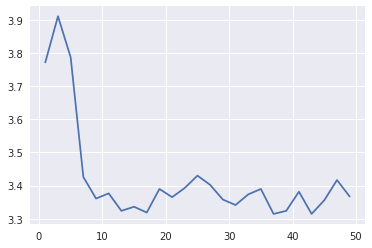

In [208]:
from sklearn import linear_model
n_iter = np.arange(1,50,2)
samples_X = [models[2].sample(n, random_state=0) for n in n_sample]
samples_Y = [models[2].predict(samples_X[i]) for i in range(len(samples_X))]
#clf = linear_model.SGDClassifier(n_iter=30)
#clf.fit(np.append(train_X, sample_X, axis=0), np.append(train_Y, sample_Y, axis=0), sample_weight=[0.5 if i <len(train_X) else 0.1 for i in range(len(train_X)+len(sample_X))])
#pred_GMM = clf.predict(test_X)
#mean_squared_error(test_Y, pred_GMM)

plt.plot(n_iter, [mean_squared_error(test_Y, linear_model.SGDClassifier(n_iter=i).fit(samples_X[4], samples_Y[4]).predict(test_X)) for i in n_iter])

In [209]:
reg.fit(samples_X[4], samples_Y[4])
pred = reg.predict(test_X)
mean_squared_error(test_Y, pred)

3.2226804123711341

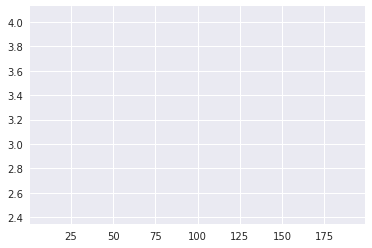

In [228]:
result = []
n_trains = np.arange(10,200,10)
for n_train in range(10,200,10):
    train_X = X[:n_train]
    train_Y = Y[:n_train]
    test_X = X[n_train:]
    test_Y = Y[n_train:]
    cl = linear_model.SGDClassifier(n_iter=10)
    cl.fit(train_X, train_Y)
    pred= cl.predict(test_X)
    result.append(mean_squared_error(test_Y, pred))
    plt.plot(n_train,mean_squared_error(test_Y, pred))

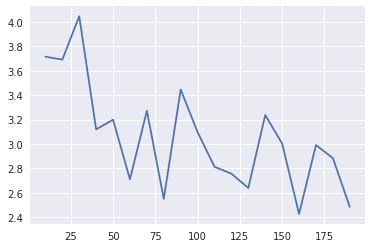

In [229]:
plt.plot(n_trains, result)